# EN3160 - Internsity Transformations and Neighborhood Filtering

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

IMG_PATH="./a1images/"

## Question 01

In [12]:
c = np.array([(50,50), (50,100), (150,255), (150,150), (255,255)])

t1 = np.linspace(0,c[0,1],c[0,0]+1-0).astype('uint8')
t2 = np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1]+1,c[3,1],c[3,0]-c[2,0]).astype('uint8')
t5 = np.linspace(c[3,1]+1,c[4,1],c[4,0]-c[3,0]).astype('uint8')

transform = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype('uint8')
print(len(transform))


256


Text(0, 0.5, 'Output, $\\mathrm{T}[f(\\mathbf{x})]$')

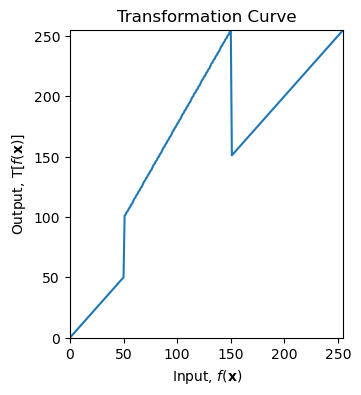

In [20]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(transform)
plt.title("Transformation Curve")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')

(np.float64(-0.5), np.float64(719.5), np.float64(809.5), np.float64(-0.5))

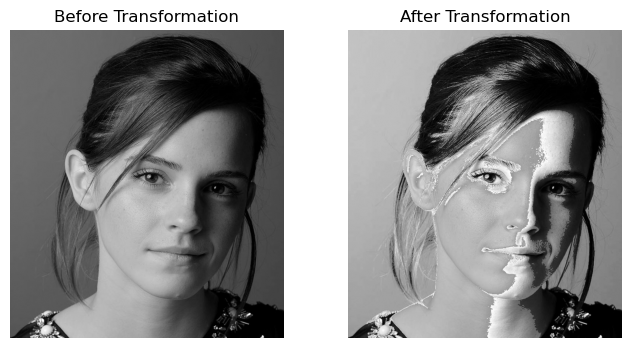

In [24]:
img_orig = cv.imread(IMG_PATH+"emma.jpg",cv.IMREAD_GRAYSCALE)
img_transformed = cv.LUT(img_orig,transform)

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.imshow(img_orig,cmap="gray")
plt.title("Before Transformation")
plt.axis('off')

plt.subplot(122)
plt.imshow(img_transformed,cmap="gray")
plt.title("After Transformation")
plt.axis('off')

## Question 2

(np.float64(-0.5), np.float64(180.5), np.float64(216.5), np.float64(-0.5))

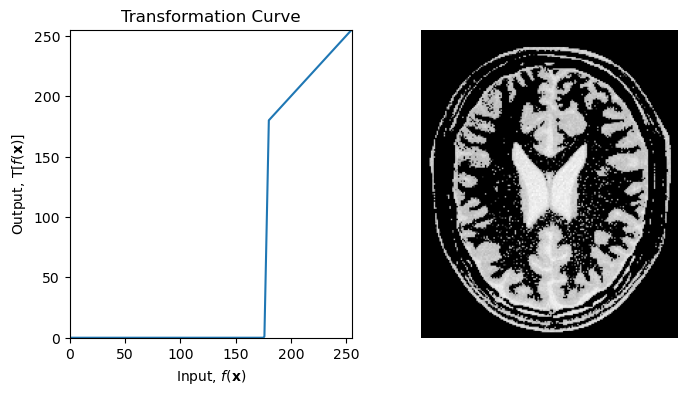

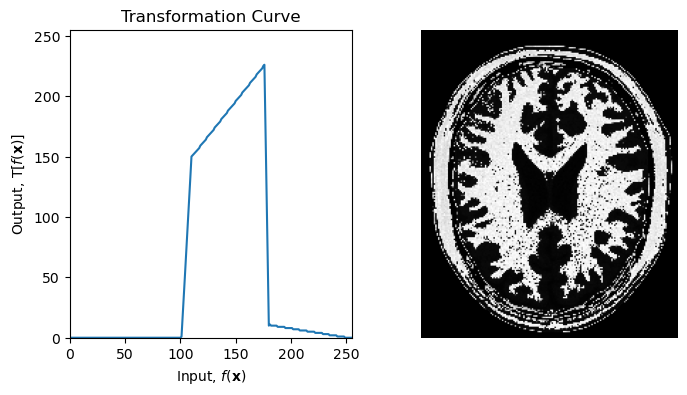

In [41]:
img_brain = cv.imread(IMG_PATH+"brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)

#####################  Tranformation for White matter  ##########################

c= np.array([(0,0), (175,0), (180,180), (255,255)]) #white matter range : 175-255

t1=np.linspace(c[0,1],c[1,1],c[1,0]+1-c[0,0]).astype('uint8')
t2=np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
t3=np.linspace(c[2,1]+1,c[3,1],c[3,0]-c[2,0]).astype('uint8')

transform_white = np.concatenate((t1,t2,t3),axis=0).astype('uint8')

img_whitematter = cv.LUT(img_brain,transform_white)

#####################  Tranformation for Gray matter  ##########################

c= np.array([(0,0), (100,0), (110,150), (175,225), (180,10), (255,0)]) #gray matter range : 100-175

t1=np.linspace(c[0,1],c[1,1],c[1,0]+1-c[0,0]).astype('uint8')
t2=np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
t3=np.linspace(c[2,1]+1,c[3,1],c[3,0]-c[2,0]).astype('uint8')
t4=np.linspace(c[3,1]+1,c[4,1],c[4,0]-c[3,0]).astype('uint8')
t5=np.linspace(c[4,1]+1,c[5,1],c[5,0]-c[4,0]).astype('uint8')

transform_gray = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype('uint8')

img_graymatter = cv.LUT(img_brain,transform_gray)


plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(transform_white)
plt.title("Transformation Curve")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')

plt.subplot(122)
plt.imshow(img_whitematter,cmap='gray')
plt.axis('off')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(transform_gray)
plt.title("Transformation Curve")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')

plt.subplot(122)
plt.imshow(img_graymatter,cmap='gray')
plt.axis('off')
